In [3]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузим первый датасет

In [6]:
data = load_boston()
x_df = pd.DataFrame(data['data'], columns=data['feature_names'])
y_df = pd.DataFrame(data['target'], columns=['y'])

## Задача*

С помощью модели полиномиальной регрессии построить прогноз цены по признаку LSTAT.

В sklearn нет модели полиномиальной регрессии, но она почти не отличается от линейной регрессии в плане поиска коэфициентов.

Линейная модель:

$$y = a_1 x + b$$

Полиномиальная модель:

$$y = a_1 x + a_2 x^2 + b$$

То есть, можем добавить столбец 'LSTAT^2' и использовать его для прогнозирования вместе со столбцом 'LSTAT'

In [21]:
def plot_graphs(x_test, y_test, y_pred):
    plt.figure()
    plt.xlabel('LSTAT')
    plt.ylabel('target')
    plt.scatter(x_test['LSTAT'], y_pred)
    plt.scatter(x_test['LSTAT'], y_test)
    plt.legend(['Прогноз', 'Факт'])

    plt.figure()
    plt.scatter(y_pred, y_test)
    plt.xlabel('Прогнозные значения')
    plt.ylabel('Фактические значения')
    plt.show()

Score (MSE) = 25.136045871043063


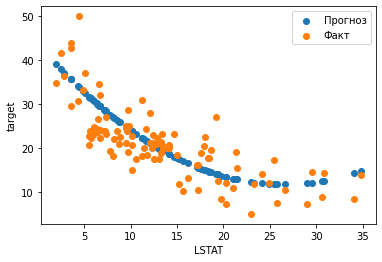

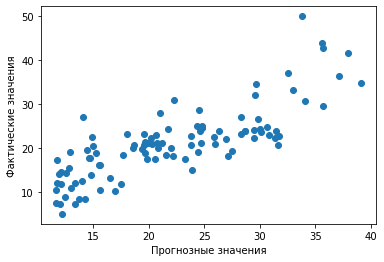

In [22]:
# Добавим столбец в исходный датафрейм X
x_df['LSTAT^2'] = x_df['LSTAT'] ** 2

# Разобьем на треин и тест выборки
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.8)

# Построим модель и получим прогноз
model = LinearRegression()
model.fit(x_train[['LSTAT', 'LSTAT^2']], y_train)
y_pred = model.predict(x_test[['LSTAT', 'LSTAT^2']])
score = mean_squared_error(y_pred, y_test)
print(f'Score (MSE) = {score}')

# Выведем графики
plot_graphs(x_test, y_test, y_pred)

## Задача

Возьмем модель посложнее. Построим модель случайного леса и оценим ее качество. Все модели в sklearn имеют одинаковый интерфейс:

- model.fit(x, y) - обучает модель
- model.predict(x) - получает предсказание для каждой строки из x

Разбивать на train и test дополнительно не нужно (выше эта операция уже проделана). Чтобы корректно сравнить качество моделей, данные должны быть одинаково разбиты.

Построить две диаграммы рассеивания как в примере выше.

In [19]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\koval\AppData\Local\Temp/ipykernel_18428/2809732084.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train, y_train)


Score (MSE) = 9.822987882352944


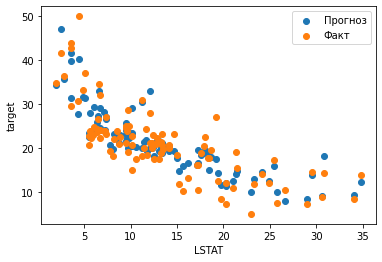

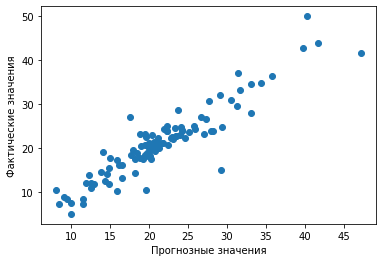

In [24]:
model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_test)
print(f'Score (MSE) = {mean_squared_error(y_pred, y_test)}')
plot_graphs(x_test, y_test, y_pred)

# Загрузим второй датасет

In [27]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [26]:
data = load_digits()
x = data.data
y = data.target
x = (x - x.mean()) / x.std()

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

## Задача

Решить эту же задачу, используя модель решающего дерева для классификации. Построить матрицу ошибок. Посмотреть на примеры, где модель ошиблась.

In [33]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)

0.8638888888888889

In [36]:
confusion_matrix(y_test, y_pred)

array([[45,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  1,  0,  0,  0,  0,  0,  2],
       [ 0,  0, 28,  0,  1,  0,  2,  0,  2,  1],
       [ 0,  0,  0, 39,  1,  0,  1,  0,  1,  1],
       [ 0,  2,  0,  1, 19,  1,  1,  1,  1,  0],
       [ 0,  0,  0,  0,  1, 41,  1,  0,  1,  2],
       [ 0,  0,  0,  0,  4,  0, 29,  0,  0,  1],
       [ 0,  0,  0,  0,  2,  1,  0, 33,  1,  0],
       [ 0,  1,  1,  3,  1,  1,  0,  0, 20,  1],
       [ 0,  2,  0,  0,  0,  2,  0,  0,  2, 31]], dtype=int64)

In [34]:
def plot_wrong_classified(x_test, y_test, y_pred, plot_first=5):
    wrong_index = y_pred != y_test
    real_y = y_test[wrong_index]
    predicted_y = y_pred[wrong_index]
    wrong_classified = x_test[wrong_index]
    for i in range(plot_first):
        plt.matshow(wrong_classified[i].reshape(8, 8))
        plt.title(f'real={real_y[i]}, predicted={predicted_y[i]}')

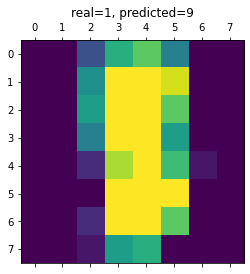

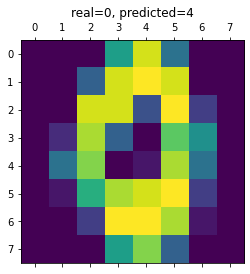

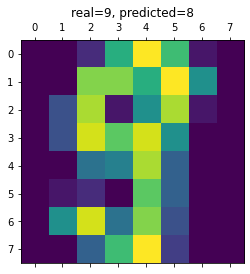

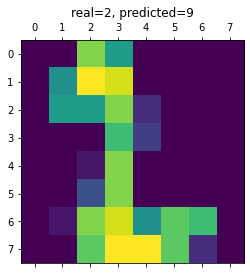

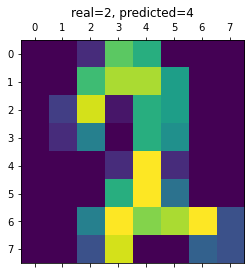

In [35]:
plot_wrong_classified(x_test, y_test, y_pred)

## Задача

Оценить качество, используя кросс-валидацию

In [37]:
from sklearn.model_selection import cross_val_score

In [42]:
cross_val = cross_val_score(model, x_train, y_train)
print('Кросс-валидация на треин выборке:',cross_val)
print('Среднее по кросс-валидации:', cross_val.mean())

print('Качество на тестовой выборке:', accuracy_score(model.predict(x_test), y_test))

Кросс-валидация на треин выборке: [0.85069444 0.85416667 0.83972125 0.83623693 0.81184669]
Среднее по кросс-валидации: 0.8385331978319783
Качество на тестовой выборке: 0.8638888888888889


На тестовой выборке качество сравнимо с качеством на кросс-валидации.

## Задача

Проверить гипотезу о том, что логистическая регрессия в среднем работает лучше на этих данных, чем решающее дерево, с уровнем значимости 0.05.

В качестве данных использовать данные по кросс-валидации на 10 фолдах.

In [44]:
import scipy.stats

In [47]:
lr = LogisticRegression(max_iter=1000)
sample1 = cross_val_score(lr, x_train, y_train)

dt = DecisionTreeClassifier()
sample2 = cross_val_score(dt, x_train, y_train)

$H0:$ точность моделей в среднем равна

$H1:$ логистическая регрессия в среднем дает лучший результат

`ttest_ind` проверяет двустороннюю альтернативу, поэтому мы должны оказаться в правом хвосте распределения и полученный pvalue нужно будет разделить на 2.

In [50]:
stat, pval = scipy.stats.ttest_ind(sample1, sample2)

if stat > 0 and pval / 2 < 0.05:
    print('H1 справедлива, логистическая регрессия работает лучше')
else:
    print('H0 справедлива, модели работают одинаково')

H1 справедлива, логистическая регрессия работает лучше
